Importing Libraries

In [ ]:
import bs4
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
#print('Librarires Successully Imported')

Defining the function for our Data Scraping

In [ ]:
def get_basketball_stats(link):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key


    #we iterate over each table row by finding each table tag tr and assign it to the object
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data


The above function fetches the data from the websites whose links are passed as arguments.The webpage is read and required data is extracted.

In [ ]:
links=['https://en.wikipedia.org/wiki/LeBron_James'\
       ,'https://en.wikipedia.org/wiki/Magic_Johnson'\
       ,'https://en.wikipedia.org/wiki/Chris_Paul'\
       ,'https://en.wikipedia.org/wiki/Charles_Barkley'\
       ,'https://en.wikipedia.org/wiki/David_Robinson'\
       ,'https://en.wikipedia.org/wiki/Stephen_Curry'\
       ,'https://en.wikipedia.org/wiki/John_Stockton'\
       ,'https://en.wikipedia.org/wiki/Russell_Westbrook'\
       ,'https://en.wikipedia.org/wiki/Damian_Lillard'\
       ,'https://en.wikipedia.org/wiki/Ray_Allen']
names=['LeBron James','Magic Johnson','Chris Paul','Charles Barkley','David Robinson','Stephen Curry','John Stockton','Russell Westbrook','Damian Lillard','Ray Allen']

links of the webpages and names are stored in lists.

In [ ]:
leborn_james_dict = get_basketball_stats(links[0])
maigc_johnson_dict = get_basketball_stats(links[1])
chris_paul_dict = get_basketball_stats(links[2])
charles_barkley_dict = get_basketball_stats(links[3])
david_robinson_dict = get_basketball_stats(links[4])
stephen_curry_dict = get_basketball_stats(links[5])
jhon_stockton_dict = get_basketball_stats(links[6])
russell_westbrook_dict = get_basketball_stats(links[7])
damian_lillard_dict = get_basketball_stats(links[8])
ray_allen_dict = get_basketball_stats(links[9])





In [ ]:
lj_table = pd.DataFrame(leborn_james_dict)
mj_table = pd.DataFrame(maigc_johnson_dict)
cp_table = pd.DataFrame(chris_paul_dict)
cb_table = pd.DataFrame(charles_barkley_dict)
dr_table = pd.DataFrame(david_robinson_dict)
sc_table = pd.DataFrame(stephen_curry_dict)
js_table = pd.DataFrame(jhon_stockton_dict)
rw_table = pd.DataFrame(russell_westbrook_dict)
dl_table = pd.DataFrame(damian_lillard_dict)
ra_table = pd.DataFrame(ray_allen_dict)


In [ ]:
l=[lj_table,mj_table,cp_table,cb_table,dr_table,sc_table,js_table,rw_table,dl_table,ra_table]
f=pd.concat(l)
f

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
...,...,...,...,...,...,...,...,...,...,...,...
14,80.0,80.0,35.2,0.477,0.363,0.913,3.2,2.6,0.8,0.3,16.3
15,80.0,80.0,36.1,0.491,0.444,0.881,3.4,2.7,1.0,0.2,16.5
16,46.0,42.0,34.0,0.458,0.453,0.915,3.1,2.4,1.1,0.2,14.2
17,79.0,0.0,25.8,0.449,0.419,0.886,2.7,1.7,0.8,0.2,10.9


In [ ]:
list_table =[lj_table, mj_table,cp_table,cb_table,dr_table,sc_table,js_table,rw_table,dl_table,ra_table]

i = 0
for name in names:
    print(name)
    display(list_table[i])
    i += 1
    

LeBron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


Magic Johnson


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,77.0,72.0,36.3,0.530,0.226,0.810,7.7,7.3,2.4,0.5,18.0
1,37.0,35.0,37.1,0.532,0.176,0.760,8.6,8.6,3.4,0.7,21.6
2,78.0,77.0,38.3,0.537,0.207,0.760,9.6,9.5,2.7,0.4,18.6
3,79.0,79.0,36.8,0.548,0.000,0.800,8.6,10.5,2.2,0.6,16.8
4,67.0,66.0,38.3,0.565,0.207,0.810,7.3,13.1,2.2,0.7,17.6
5,77.0,77.0,36.1,0.561,0.189,0.843,6.2,12.6,1.5,0.3,18.3
6,72.0,70.0,35.8,0.526,0.233,0.871,5.9,12.6,1.6,0.2,18.8
7,80.0,80.0,36.3,0.522,0.205,0.848,6.3,12.2,1.7,0.4,23.9
8,72.0,70.0,36.6,0.492,0.196,0.853,6.2,11.9,1.6,0.2,19.6
9,77.0,77.0,37.5,0.509,0.314,0.911,7.9,12.8,1.8,0.3,22.5


Chris Paul


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,78.0,78.0,36.0,0.430,0.282,0.847,5.1,7.8,2.2,0.1,16.1
1,64.0,64.0,36.8,0.437,0.350,0.818,4.4,8.9,1.8,0.0,17.3
2,80.0,80.0,37.6,0.488,0.369,0.851,4.0,11.6,2.7,0.1,21.1
3,78.0,78.0,38.5,0.503,0.364,0.868,5.5,11.0,2.8,0.1,22.8
4,45.0,45.0,38.0,0.493,0.409,0.847,4.2,10.7,2.1,0.2,18.7
5,80.0,80.0,36.0,0.463,0.388,0.878,4.1,9.8,2.4,0.1,15.8
6,60.0,60.0,36.4,0.478,0.371,0.861,3.6,9.1,2.5,0.1,19.8
7,70.0,70.0,33.4,0.481,0.328,0.885,3.7,9.7,2.4,0.1,16.9
8,62.0,62.0,35.0,0.467,0.368,0.855,4.3,10.7,2.5,0.1,19.1
9,82.0,82.0,34.8,0.485,0.398,0.900,4.6,10.2,1.9,0.2,19.1


Charles Barkley


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,60.0,28.6,0.545,0.167,0.733,8.6,1.9,1.2,1.0,14.0
1,80.0,80.0,36.9,0.572,0.227,0.685,12.8,3.9,2.2,1.6,20.0
2,68.0,62.0,40.3,0.594,0.202,0.761,14.6,4.9,1.8,1.5,23.0
3,80.0,80.0,39.6,0.587,0.280,0.751,11.9,3.2,1.3,1.3,28.3
4,79.0,79.0,39.1,0.579,0.216,0.753,12.5,4.1,1.6,0.9,25.8
5,79.0,79.0,39.1,0.600,0.217,0.749,11.5,3.9,1.9,0.6,25.2
6,67.0,67.0,37.3,0.570,0.284,0.722,10.1,4.2,1.6,0.5,27.6
7,75.0,75.0,38.4,0.552,0.234,0.695,11.1,4.1,1.8,0.6,23.1
8,76.0,76.0,37.6,0.520,0.305,0.765,12.2,5.1,1.6,1.0,25.6
9,65.0,65.0,35.4,0.495,0.270,0.704,11.2,4.6,1.6,0.6,21.6


David Robinson


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,81.0,36.6,0.531,0.000,0.732,12.0,2.0,1.7,3.9,24.3
1,82.0,81.0,37.7,0.552,0.143,0.762,13.0,2.5,1.5,3.9,25.6
2,68.0,68.0,37.7,0.551,0.125,0.701,12.2,2.7,2.3,4.5,23.2
3,82.0,82.0,39.2,0.501,0.176,0.732,11.7,3.7,1.5,3.2,23.4
4,80.0,80.0,40.5,0.507,0.345,0.749,10.7,4.8,1.7,3.3,29.8
5,81.0,81.0,38.0,0.530,0.300,0.774,10.8,2.9,1.7,3.2,27.6
6,82.0,82.0,36.8,0.516,0.333,0.761,12.2,3.0,1.4,3.3,25.0
7,6.0,6.0,24.5,0.500,0.000,0.654,8.5,1.3,1.0,1.0,17.7
8,73.0,73.0,33.7,0.511,0.250,0.735,10.6,2.7,0.9,2.6,21.6
9,49.0,49.0,31.7,0.509,0.000,0.658,10.0,2.1,1.4,2.4,15.8


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3


John Stockton


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,5.0,18.2,0.471,0.182,0.736,1.3,5.1,1.3,0.1,5.6
1,82.0,38.0,23.6,0.489,0.133,0.839,2.2,7.4,1.9,0.1,7.7
2,82.0,2.0,22.7,0.499,0.179,0.782,1.8,8.2,2.2,0.2,7.9
3,82.0,79.0,34.7,0.574,0.358,0.840,2.9,13.8,3.0,0.2,14.7
4,82.0,82.0,38.7,0.538,0.242,0.863,3.0,13.6,3.2,0.2,17.1
5,78.0,78.0,37.4,0.514,0.416,0.819,2.6,14.5,2.7,0.2,17.2
6,82.0,82.0,37.8,0.507,0.345,0.836,2.9,14.2,2.9,0.2,17.2
7,82.0,82.0,36.6,0.482,0.407,0.842,3.3,13.7,3.0,0.3,15.8
8,82.0,82.0,34.9,0.486,0.385,0.798,2.9,12.0,2.4,0.3,15.1
9,82.0,82.0,36.2,0.528,0.322,0.805,3.1,12.6,2.4,0.3,15.1


Russell Westbrook


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,65.0,32.5,0.398,0.271,0.815,4.9,5.3,1.3,0.2,15.3
1,82.0,82.0,34.3,0.418,0.221,0.780,4.9,8.0,1.3,0.4,16.1
2,82.0,82.0,34.7,0.442,0.330,0.842,4.6,8.2,1.9,0.4,21.9
3,66.0,66.0,35.3,0.457,0.316,0.823,4.6,5.5,1.7,0.3,23.6
4,82.0,82.0,34.9,0.438,0.323,0.800,5.2,7.4,1.8,0.3,23.2
5,46.0,46.0,30.7,0.437,0.318,0.826,5.7,6.9,1.9,0.2,21.8
6,67.0,67.0,34.4,0.426,0.299,0.835,7.3,8.6,2.1,0.2,28.1
7,80.0,80.0,34.4,0.454,0.296,0.812,7.8,10.4,2.0,0.3,23.5
8,81.0,81.0,34.6,0.425,0.343,0.845,10.7,10.4,1.6,0.4,31.6
9,80.0,80.0,36.4,0.449,0.298,0.737,10.1,10.3,1.8,0.3,25.4


Damian Lillard


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.6,0.429,0.368,0.844,3.1,6.5,0.9,0.2,19.0
1,82.0,82.0,35.8,0.424,0.394,0.871,3.5,5.6,0.8,0.3,20.7
2,82.0,82.0,35.7,0.434,0.343,0.864,4.6,6.2,1.2,0.3,21.0
3,75.0,75.0,35.7,0.419,0.375,0.892,4.0,6.8,0.9,0.4,25.1
4,75.0,75.0,35.9,0.444,0.370,0.895,4.9,5.9,0.9,0.3,27.0
5,73.0,73.0,36.6,0.439,0.361,0.916,4.5,6.6,1.1,0.4,26.9
6,80.0,80.0,35.5,0.444,0.369,0.912,4.6,6.9,1.1,0.4,25.8
7,66.0,66.0,37.5,0.463,0.401,0.888,4.3,8.0,1.1,0.3,30.0


Ray Allen


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,81.0,30.9,0.430,0.393,0.823,4.0,2.6,0.9,0.1,13.4
1,82.0,82.0,40.1,0.428,0.364,0.875,4.9,4.3,1.4,0.1,19.5
2,50.0,50.0,34.4,0.450,0.356,0.903,4.2,3.6,1.1,0.1,17.1
3,82.0,82.0,37.4,0.455,0.423,0.887,4.4,3.8,1.3,0.2,22.1
4,82.0,82.0,38.2,0.480,0.433,0.888,5.2,4.6,1.5,0.2,22.0
5,69.0,67.0,36.6,0.462,0.434,0.873,4.5,3.9,1.3,0.3,21.8
6,47.0,46.0,35.8,0.437,0.395,0.913,4.6,3.5,1.2,0.2,21.3
7,29.0,29.0,41.3,0.441,0.351,0.920,5.6,5.9,1.6,0.1,24.5
8,56.0,56.0,38.4,0.440,0.392,0.904,5.1,4.8,1.3,0.2,23.0
9,78.0,78.0,39.3,0.428,0.376,0.883,4.4,3.7,1.1,0.1,23.9


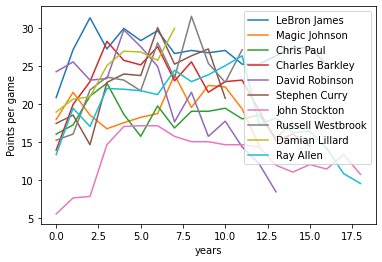

In [ ]:

j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

In [ ]:
csv_name = 'CP.csv'
cp_table.to_csv(csv_name)